In [59]:
#imports
import random
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

print(sys.getrecursionlimit())
sys.setrecursionlimit(20000)
print(sys.getrecursionlimit())

20000
20000


### Road Cluster **Identification**

In [60]:
#Function to give the cluster arrays
#Input: K-Means output image
#Output: Produces k arrays, where in each array the kth cluster pixels will have value 1 and remaining pixels will have value 0

def clusters_segmentation(array_to_be_segmented):
  final_segmented_array = []
  check_value_list = np.unique(array_to_be_segmented)
  #print(check_value_list)
  r = len(array_to_be_segmented)
  c = len(array_to_be_segmented[0])
  for i in  range(len(check_value_list)):
    temp_f = []
    for j in range(r):
      temp_a = []
      for k in range(c):
        if(array_to_be_segmented[j][k] == check_value_list[i]):
          temp_a.append(1)
        else:
          temp_a.append(0)
      temp_f.append(temp_a)
    final_segmented_array.append(temp_f)
  return final_segmented_array

In [61]:
#Function to produce the longest connected component
#Input: Clustered Image
#Output: 2 values: 
# 1) maxi_row which contains maxiumum connected component in each row 
# 2) maxi_col which contains maxiumum connected component in each column
def longest_connected_component(clustered_image):
    
    r = len(clustered_image)
    c = len(clustered_image[0])
 
    maxi_col = []
    temp_count_col = -1

    for j in range(r):
        temp_count  = 0
        for k in range(c-1):
            if(clustered_image[j][k] == 1) and (clustered_image[j][k+1]!=0):
                temp_count += 1
            else:
                temp_count += 1
                if(temp_count > temp_count_col):
                    temp_count_col = temp_count
                    temp_count  = 0 
        maxi_col.append(temp_count_col)
        temp_count_col = 0
  
    maxi_row = []
    temp_count_row = -1
    for j in range(c):
        temp_count = 0
        for k in range(r-1):
            if(clustered_image[k][j] == 1) and (clustered_image[k+1][j]!=0):
                temp_count  += 1
            else:
                temp_count += 1 
                if(temp_count > temp_count_row):
                    temp_count_row = temp_count
                    temp_count  = 0 
        maxi_row.append(temp_count_row)
        temp_count_row=0
    
    maxi_row_count = 0
    max_col_count = 0
    for i in range(len(maxi_row)):
      if(maxi_row[i] > ((r/2))):
        maxi_row_count += 1
    for j in range((len(maxi_col))):
      if(maxi_col[j] > ((c/2))):
        max_col_count += 1


    return maxi_row_count,max_col_count
 

In [62]:
#Function to road cluster segmentation
#Input: List of clustered images after clusters_segmentation()
#Output: Road cluster segmented image
def solve(cluster_images_list):
  final_ans = -1
  final_index = -1

  print(len(cluster_images_list))
  for i in range(len(cluster_images_list)):
    r_count, c_count = longest_connected_component(cluster_images_list[i])
    if((r_count + c_count) >= final_ans):
      final_ans = (r_count + c_count) 
      final_index = i

  print(final_index)
  final_clustered_list = cluster_images_list[final_index]
  r =  len(final_clustered_list)
  c =  len(final_clustered_list[0])
  for i in range(r):
    for j in range(c):
      if(final_clustered_list[i][j] == 1):
        final_clustered_list[i][j] = 255
  plt.imshow(final_clustered_list,cmap="gray", vmin=0, vmax=255)
  plt.show()
  #Uncomment these to write the image
  #a = np.array(final_clustered_list)
  #cv2.imwrite('C:/Users/Radha Krishna/final_image_1.png',a)


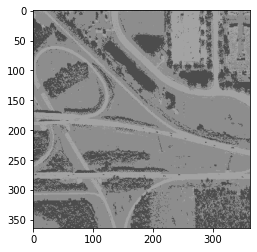

(364, 363)
[ 76 141 164]


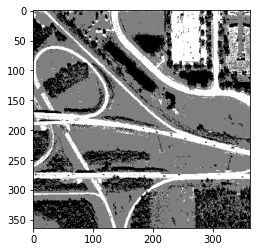

[  0 127 255]
3
2


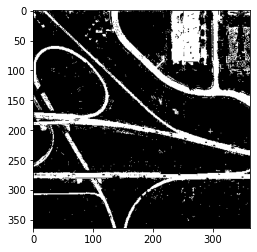

In [63]:
#Reading the image after k-means clustering
cimage_b = cv2.imread("c_1.png",0)
plt.imshow(cimage_b,cmap="gray", vmin=0, vmax=255)
plt.show()
print(cimage_b.shape)
print(np.unique(cimage_b))

#Imporivng the intensities for better visualization
r,c = cimage_b.shape
dummy_v = []
for i in range(r):
    t = []
    for j in range(c):
        if(cimage_b[i][j] == 164):
            t.append(255)
        elif(cimage_b[i][j] == 76):
            t.append(0)
        else:
            t.append(127)
    dummy_v.append(t)
plt.imshow(dummy_v,cmap="gray", vmin=0, vmax=255)
plt.show()
print(np.unique(dummy_v))

#Create clusters segmented list
clusters_segmented_array = clusters_segmentation(dummy_v)
#Call the solve method with clustered segemneted images as input
solve(clusters_segmented_array)

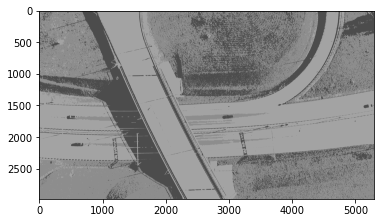

(2977, 5298)
[ 76 141 164]


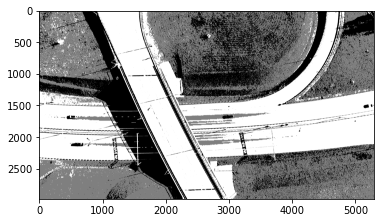

3
2


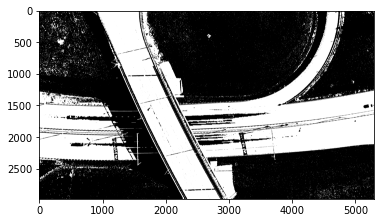

In [65]:
#Reading the image after k-means clustering
cimage_b = cv2.imread("c_2.png",0)
plt.imshow(cimage_b,cmap="gray", vmin=0, vmax=255)
plt.show()
print(cimage_b.shape)
print(np.unique(cimage_b))

#Imporivng the intensities for better visualization
r,c = cimage_b.shape
dummy_v = []
for i in range(r):
    t = []
    for j in range(c):
        if(cimage_b[i][j] == 164):
            t.append(255)
        elif(cimage_b[i][j] == 76):
            t.append(0)
        else:
            t.append(127)
    dummy_v.append(t)
plt.imshow(dummy_v,cmap="gray", vmin=0, vmax=255)
plt.show()

#Create clusters segmented list
clusters_segmented_array = clusters_segmentation(dummy_v)
#Call the solve method with clustered segemneted images as input
solve(clusters_segmented_array)

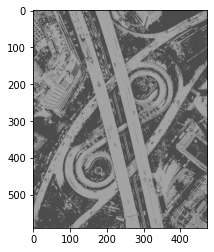

(591, 474)
[ 76 141 164]


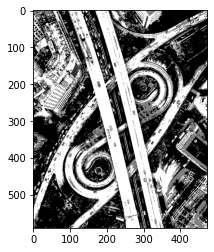

3
2


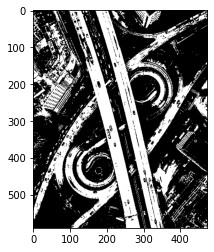

In [66]:
#Reading the image after k-means clustering
cimage_b = cv2.imread("c_3.png",0)
plt.imshow(cimage_b,cmap="gray", vmin=0, vmax=255)
plt.show()
print(cimage_b.shape)
print(np.unique(cimage_b))

#Imporivng the intensities for better visualization
r,c = cimage_b.shape
dummy_v = []
for i in range(r):
    t = []
    for j in range(c):
        if(cimage_b[i][j] == 164):
            t.append(255)
        elif(cimage_b[i][j] == 76):
            t.append(0)
        else:
            t.append(127)
    dummy_v.append(t)
plt.imshow(dummy_v,cmap="gray", vmin=0, vmax=255)
plt.show()

#Create clusters segmented list
clusters_segmented_array = clusters_segmentation(dummy_v)
#Call the solve method with clustered segemneted images as input
solve(clusters_segmented_array)

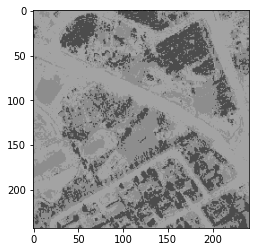

(243, 241)
[ 76 141 164]


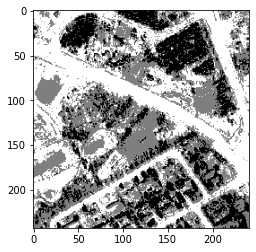

3
2


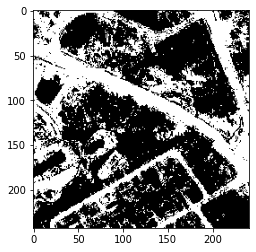

In [67]:
#Reading the image after k-means clustering
cimage_b = cv2.imread("c_4.png",0)
plt.imshow(cimage_b,cmap="gray", vmin=0, vmax=255)
plt.show()
print(cimage_b.shape)
print(np.unique(cimage_b))

#Imporivng the intensities for better visualization
r,c = cimage_b.shape
dummy_v = []
for i in range(r):
    t = []
    for j in range(c):
        if(cimage_b[i][j] == 164):
            t.append(255)
        elif(cimage_b[i][j] == 76):
            t.append(0)
        else:
            t.append(127)
    dummy_v.append(t)
plt.imshow(dummy_v,cmap="gray", vmin=0, vmax=255)
plt.show()

#Create clusters segmented list
clusters_segmented_array = clusters_segmentation(dummy_v)
#Call the solve method with clustered segemneted images as input
solve(clusters_segmented_array)

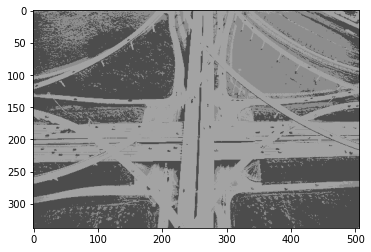

(338, 507)
[ 76 141 164]


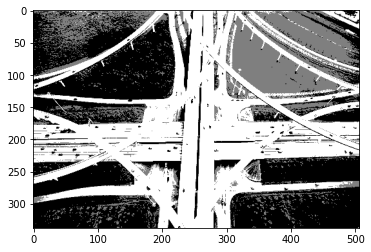

3
2


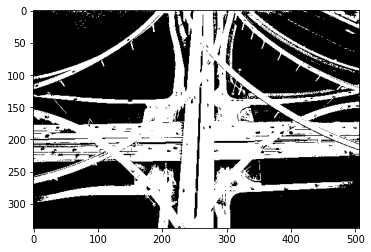

In [68]:
#Reading the image after k-means clustering
cimage_b = cv2.imread("c_5.png",0)
plt.imshow(cimage_b,cmap="gray", vmin=0, vmax=255)
plt.show()
print(cimage_b.shape)
print(np.unique(cimage_b))

#Imporivng the intensities for better visualization
r,c = cimage_b.shape
dummy_v = []
for i in range(r):
    t = []
    for j in range(c):
        if(cimage_b[i][j] == 164):
            t.append(255)
        elif(cimage_b[i][j] == 76):
            t.append(0)
        else:
            t.append(127)
    dummy_v.append(t)
plt.imshow(dummy_v,cmap="gray", vmin=0, vmax=255)
plt.show()

#Create clusters segmented list
clusters_segmented_array = clusters_segmentation(dummy_v)
#Call the solve method with clustered segemneted images as input
solve(clusters_segmented_array)

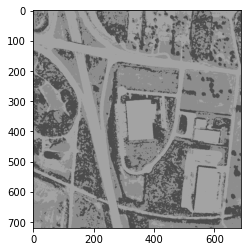

(720, 687)
[ 76 141 164]


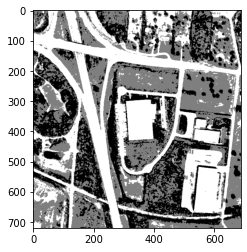

3
2


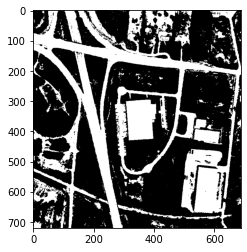

In [70]:
#Reading the image after k-means clustering
cimage_b = cv2.imread("c_9.png",0)
plt.imshow(cimage_b,cmap="gray", vmin=0, vmax=255)
plt.show()
print(cimage_b.shape)
print(np.unique(cimage_b))

#Imporivng the intensities for better visualization
r,c = cimage_b.shape
dummy_v = []
for i in range(r):
    t = []
    for j in range(c):
        if(cimage_b[i][j] == 164):
            t.append(255)
        elif(cimage_b[i][j] == 76):
            t.append(0)
        else:
            t.append(127)
    dummy_v.append(t)
plt.imshow(dummy_v,cmap="gray", vmin=0, vmax=255)
plt.show()


#Create clusters segmented list
clusters_segmented_array = clusters_segmentation(dummy_v)
#Call the solve method with clustered segemneted images as input
solve(clusters_segmented_array)

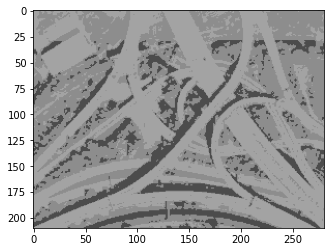

(210, 281)
[ 76 141 164]


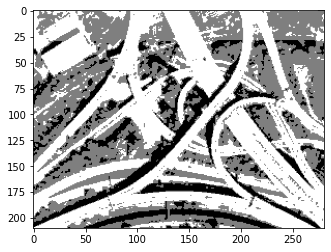

3
2


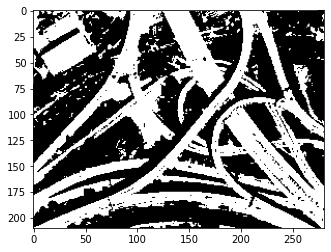

In [71]:
#Reading the image after k-means clustering
cimage_b = cv2.imread("c_10.png",0)
plt.imshow(cimage_b,cmap="gray", vmin=0, vmax=255)
plt.show()
print(cimage_b.shape)
print(np.unique(cimage_b))

#Imporivng the intensities for better visualization
r,c = cimage_b.shape
dummy_v = []
for i in range(r):
    t = []
    for j in range(c):
        if(cimage_b[i][j] == 164):
            t.append(255)
        elif(cimage_b[i][j] == 76):
            t.append(0)
        else:
            t.append(127)
    dummy_v.append(t)
plt.imshow(dummy_v,cmap="gray", vmin=0, vmax=255)
plt.show()


#Create clusters segmented list
clusters_segmented_array = clusters_segmentation(dummy_v)
#Call the solve method with clustered segemneted images as input
solve(clusters_segmented_array)

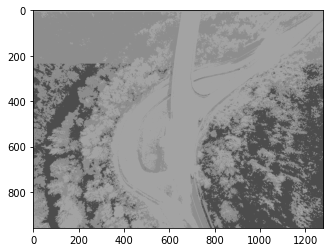

(959, 1280)
[ 76 141 164]


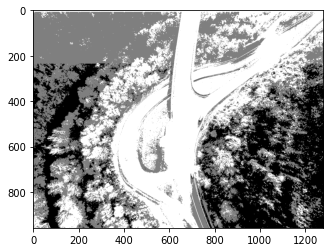

3
2


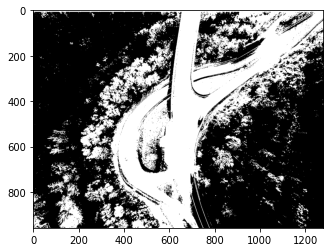

In [72]:
#Reading the image after k-means clustering
cimage_b = cv2.imread("c_12.png",0)
plt.imshow(cimage_b,cmap="gray", vmin=0, vmax=255)
plt.show()
print(cimage_b.shape)
print(np.unique(cimage_b))

#Imporivng the intensities for better visualization
r,c = cimage_b.shape
dummy_v = []
for i in range(r):
    t = []
    for j in range(c):
        if(cimage_b[i][j] == 164):
            t.append(255)
        elif(cimage_b[i][j] == 76):
            t.append(0)
        else:
            t.append(127)
    dummy_v.append(t)
plt.imshow(dummy_v,cmap="gray", vmin=0, vmax=255)
plt.show()


#Create clusters segmented list
clusters_segmented_array = clusters_segmentation(dummy_v)
#Call the solve method with clustered segemneted images as input
solve(clusters_segmented_array)

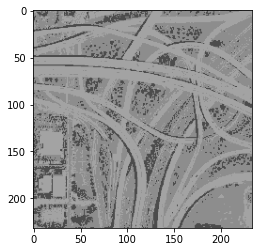

(232, 233)
[ 76 141 164]


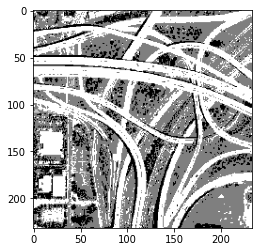

3
2


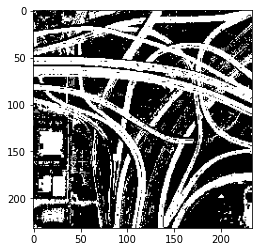

In [73]:
#Reading the image after k-means clustering
cimage_b = cv2.imread("c_14.png",0)
plt.imshow(cimage_b,cmap="gray", vmin=0, vmax=255)
plt.show()
print(cimage_b.shape)
print(np.unique(cimage_b))

#Imporivng the intensities for better visualization
r,c = cimage_b.shape
dummy_v = []
for i in range(r):
    t = []
    for j in range(c):
        if(cimage_b[i][j] == 164):
            t.append(255)
        elif(cimage_b[i][j] == 76):
            t.append(0)
        else:
            t.append(127)
    dummy_v.append(t)
plt.imshow(dummy_v,cmap="gray", vmin=0, vmax=255)
plt.show()


#Create clusters segmented list
clusters_segmented_array = clusters_segmentation(dummy_v)
#Call the solve method with clustered segemneted images as input
solve(clusters_segmented_array)

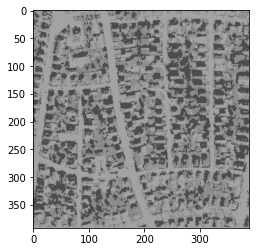

(392, 389)
[ 76 141 164]


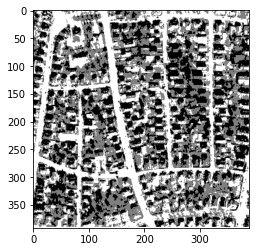

3
2


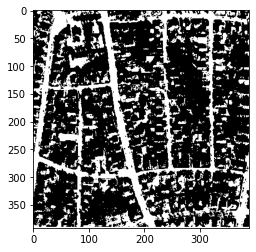

In [74]:
#Reading the image after k-means clustering
cimage_b = cv2.imread("c_15.png",0)
plt.imshow(cimage_b,cmap="gray", vmin=0, vmax=255)
plt.show()
print(cimage_b.shape)
print(np.unique(cimage_b))

#Imporivng the intensities for better visualization
r,c = cimage_b.shape

dummy_v = []
for i in range(r):
    t = []
    for j in range(c):
        if(cimage_b[i][j] == 164):
            t.append(255)
        elif(cimage_b[i][j] == 76):
            t.append(0)
        else:
            t.append(127)
    dummy_v.append(t)
plt.imshow(dummy_v,cmap="gray", vmin=0, vmax=255)
plt.show()


#Create clusters segmented list
clusters_segmented_array = clusters_segmentation(dummy_v)
#Call the solve method with clustered segemneted images as input
solve(clusters_segmented_array)

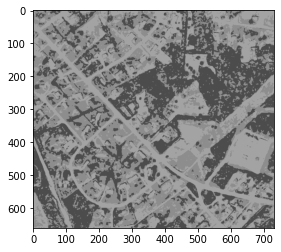

(661, 732)
[ 76 141 164]


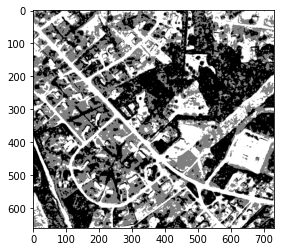

3
2


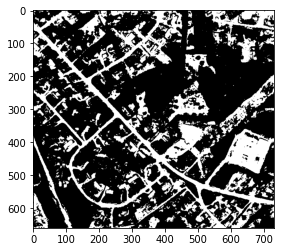

In [75]:
#Reading the image after k-means clustering
cimage_b = cv2.imread("c_16.png",0)
plt.imshow(cimage_b,cmap="gray", vmin=0, vmax=255)
plt.show()
print(cimage_b.shape)
print(np.unique(cimage_b))

#Imporivng the intensities for better visualization
r,c = cimage_b.shape
dummy_v = []
for i in range(r):
    t = []
    for j in range(c):
        if(cimage_b[i][j] == 164):
            t.append(255)
        elif(cimage_b[i][j] == 76):
            t.append(0)
        else:
            t.append(127)
    dummy_v.append(t)
plt.imshow(dummy_v,cmap="gray", vmin=0, vmax=255)
plt.show()


#Create clusters segmented list
clusters_segmented_array = clusters_segmentation(dummy_v)
#Call the solve method with clustered segemneted images as input
solve(clusters_segmented_array)

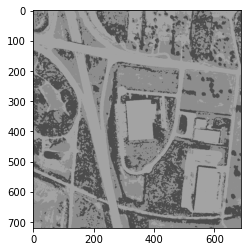

(720, 687)
[ 76 141 164]


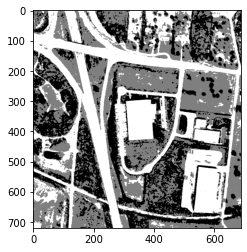

3
2


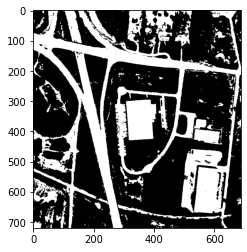

In [76]:
#Reading the image after k-means clustering
cimage_b = cv2.imread("c_17.png",0)
plt.imshow(cimage_b,cmap="gray", vmin=0, vmax=255)
plt.show()
print(cimage_b.shape)
print(np.unique(cimage_b))

#Imporivng the intensities for better visualization
r,c = cimage_b.shape
dummy_v = []
for i in range(r):
    t = []
    for j in range(c):
        if(cimage_b[i][j] == 164):
            t.append(255)
        elif(cimage_b[i][j] == 76):
            t.append(0)
        else:
            t.append(127)
    dummy_v.append(t)
plt.imshow(dummy_v,cmap="gray", vmin=0, vmax=255)
plt.show()


#Create clusters segmented list
clusters_segmented_array = clusters_segmentation(dummy_v)
#Call the solve method with clustered segemneted images as input
solve(clusters_segmented_array)

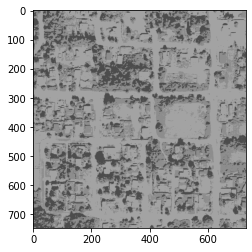

(747, 730)
[ 76 141 164]


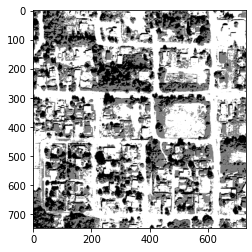

3
2


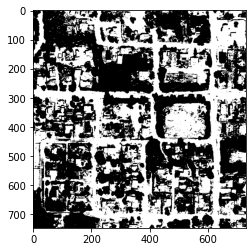

In [77]:
#Reading the image after k-means clustering
cimage_b = cv2.imread("c_18.png",0)
plt.imshow(cimage_b,cmap="gray", vmin=0, vmax=255)
plt.show()
print(cimage_b.shape)
print(np.unique(cimage_b))

#Imporivng the intensities for better visualization
r,c = cimage_b.shape
dummy_v = []
for i in range(r):
    t = []
    for j in range(c):
        if(cimage_b[i][j] == 164):
            t.append(255)
        elif(cimage_b[i][j] == 76):
            t.append(0)
        else:
            t.append(127)
    dummy_v.append(t)
plt.imshow(dummy_v,cmap="gray", vmin=0, vmax=255)
plt.show()


#Create clusters segmented list
clusters_segmented_array = clusters_segmentation(dummy_v)
#Call the solve method with clustered segemneted images as input
solve(clusters_segmented_array)

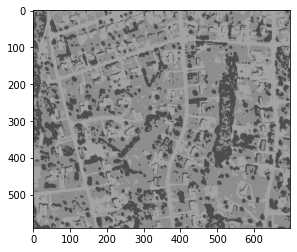

(591, 698)
[ 76 141 164]


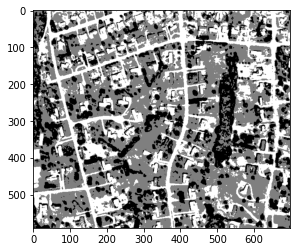

3
2


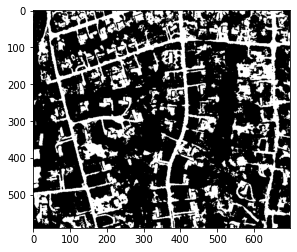

In [79]:
#Reading the image after k-means clustering
cimage_b = cv2.imread("c_20.png",0)
plt.imshow(cimage_b,cmap="gray", vmin=0, vmax=255)
plt.show()
print(cimage_b.shape)
print(np.unique(cimage_b))

#Imporivng the intensities for better visualization
r,c = cimage_b.shape
dummy_v = []
for i in range(r):
    t = []
    for j in range(c):
        if(cimage_b[i][j] == 164):
            t.append(255)
        elif(cimage_b[i][j] == 76):
            t.append(0)
        else:
            t.append(127)
    dummy_v.append(t)
plt.imshow(dummy_v,cmap="gray", vmin=0, vmax=255)
plt.show()


#Create clusters segmented list
clusters_segmented_array = clusters_segmentation(dummy_v)
#Call the solve method with clustered segemneted images as input
solve(clusters_segmented_array)

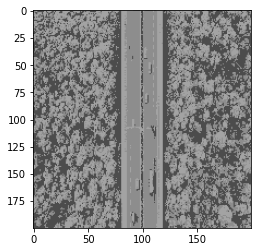

(200, 200)
[ 76 141 164]


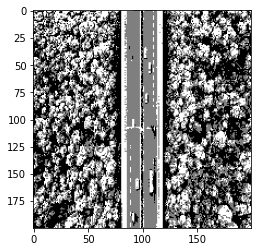

3
1


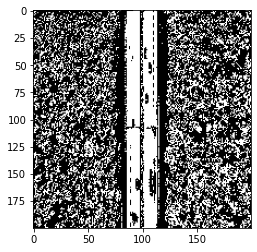

In [80]:
#Reading the image after k-means clustering
cimage_b = cv2.imread("n_2.png",0)
plt.imshow(cimage_b,cmap="gray", vmin=0, vmax=255)
plt.show()
print(cimage_b.shape)
print(np.unique(cimage_b))

#Imporivng the intensities for better visualization
r,c = cimage_b.shape
dummy_v = []
for i in range(r):
    t = []
    for j in range(c):
        if(cimage_b[i][j] == 164):
            t.append(255)
        elif(cimage_b[i][j] == 76):
            t.append(0)
        else:
            t.append(127)
    dummy_v.append(t)
plt.imshow(dummy_v,cmap="gray", vmin=0, vmax=255)
plt.show()

#Create clusters segmented list
clusters_segmented_array = clusters_segmentation(dummy_v)
#Call the solve method with clustered segemneted images as input
solve(clusters_segmented_array)

# Road Cluster **Filtering**

In [81]:
#Function for 2Pass alogorithm 
#Input: Image for the dilation process or any image which has only 2 unique either
# foreground(1) or background(0)
#Output: Image after 2 pass alogrithm
def two_pass_algo(nodes_list,fly):
    r = len(nodes_list)
    c = len(nodes_list[0])
    dict_1 = {}
    labels = 0
    two_pass_arr = []
    for i in range(r):
        two_pass_temp = []
        for j in range(c):
            if(nodes_list[i][j] == 0):
                two_pass_temp.append(0)
            else:
                val_1 = 0
                val_2 = 0
                if((i-1)>=0):
                    val_1 = two_pass_arr[i-1][j]
                if((j-1)>=0):
                    val_2 = two_pass_temp[j-1]
                
                if(val_1 == 0 and val_2 == 0):
                    labels += 1
                    two_pass_temp.append(labels)
                elif(val_1 == val_2):
                    two_pass_temp.append(val_1)
                elif(val_1 == 0):
                    two_pass_temp.append(val_2)
                elif(val_2 == 0):
                    two_pass_temp.append(val_1)
                else:
                    two_pass_temp.append(min(val_1,val_2))
                    key_dict =  max(val_1,val_2)
                    value_dict = min(val_1,val_2)
                    if(key_dict in dict_1.keys()):
                        if(value_dict < dict_1[key_dict]):
                            dict_1[key_dict] = value_dict
                    elif(value_dict in dict_1.keys()):
                        dict_1[key_dict] = dict_1[value_dict]
                    else:
                      dict_1[key_dict] = value_dict
           
        two_pass_arr.append(two_pass_temp)
    
    for i in range(r):
        for j in range(c):
            key_1 =  two_pass_arr[i][j]
            if key_1 in dict_1.keys():
                two_pass_arr[i][j] =  dict_1[key_1]
    
    #print(len(np.unique(two_pass_arr)))

    dict_keys_two_pass_arary = {}
    
    for i in range(len(two_pass_arr)):
      for j in range(len(two_pass_arr[0])):
        if(two_pass_arr[i][j] != 0):
          if(two_pass_arr[i][j] not in dict_keys_two_pass_arary.keys()):
            dict_keys_two_pass_arary[two_pass_arr[i][j]] = 1
          else:
            dict_keys_two_pass_arary[two_pass_arr[i][j]] += 1
    
    #print(len(dict_keys_two_pass_arary.keys()))
    dict_keys_two_pass_arary = dict(sorted(dict_keys_two_pass_arary.items(), key=lambda item: item[1]))
    #print(dict_keys_two_pass_arary)
    key_dict_sorted = list(dict_keys_two_pass_arary.keys())
    #print(len(key_dict_sorted))
    len_keys = len(key_dict_sorted)
    
    final_keys = []
    for i in range(fly):
      #print(str(i))
      index = len_keys - i
      final_keys.append(key_dict_sorted[index-1])
    
    for i in range(len(two_pass_arr)):
      for j in range(len(two_pass_arr[0])):
        if(two_pass_arr[i][j] in final_keys):
          two_pass_arr[i][j] = 255
        else:
          two_pass_arr[i][j] = 0
      
    return two_pass_arr

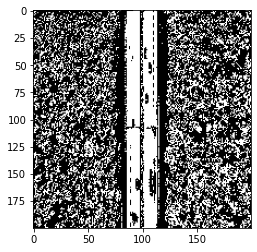

(200, 200)
[  0 255]
[0 1]


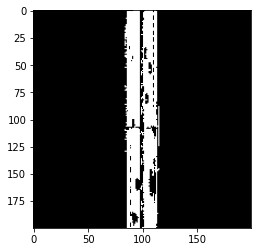

In [84]:
#Reading the image after k-means clustering
cimage_b = cv2.imread("abc_1.png",0)
plt.imshow(cimage_b,cmap="gray", vmin=0, vmax=255)
plt.show()
print(cimage_b.shape)
print(np.unique(cimage_b))

#Imporivng the intensities for better visualization
r,c = cimage_b.shape
dummy_v = []
for i in range(r):
    t = []
    for j in range(c):
        if(cimage_b[i][j] == 255):
            t.append(1)
        else:
            t.append(0)
    dummy_v.append(t)
print(np.unique(dummy_v))
#Call the solve method with clustered segemneted images as input
ans = two_pass_algo(dummy_v,2)
plt.imshow(ans,cmap="gray", vmin=0, vmax=255)
